In [1]:
import json
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

with open('../results/2020-09-02-14-04-12.json', 'r') as f:
    results = json.load(f)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/matt/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/Users/matt/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
# Calculate sentiment scores for all suggestions show
def getSuggestionScores(path_data):
    suggestions = []
    for data in path_data:
        suggestions += [sid.polarity_scores(s)['compound'] for s in data['suggestions']]
    return(suggestions)

df = pd.DataFrame(results)
df['K'] = df['pipe'].apply(lambda s: int(s.split('_')[-1]))
df['suggestionsScores'] = df['path_data'].apply(getSuggestionScores)
df.head()

,pipe,group,target,path_data,K,suggestionsScores
0,3_bias_topK_3,0,As a teacher this is true some selfish teacher...,"[{'request_time': 0.00017714500427246094, 'sug...",3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,3_bias_topK_3,1,As a teacher this is true some selfish teacher...,"[{'request_time': 1.2159347534179688e-05, 'sug...",3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,3_bias_topK_3,-1,As a teacher this is true some selfish teacher...,"[{'request_time': 1.1920928955078125e-05, 'sug...",3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,4_bias_topK_4,0,As a teacher this is true some selfish teacher...,"[{'request_time': 4.601478576660156e-05, 'sugg...",4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4_bias_topK_4,1,As a teacher this is true some selfish teacher...,"[{'request_time': 1.52587890625e-05, 'suggesti...",4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [3]:
dg = df.groupby(['K','group']).agg({'suggestionsScores': 'sum'}).reset_index()
dg.head(30)

,K,group,suggestionsScores
0,3,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,3,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,3,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,4,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,4,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,5,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,5,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,5,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,6,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


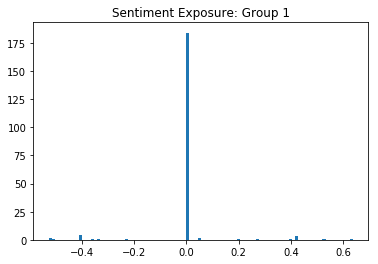

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy

plt.title("Sentiment Exposure: Group 1")
_ = plt.hist(dg.iloc[2]['suggestionsScores'],bins=100)
plt.show()

In [5]:
from scipy.stats import mannwhitneyu
# Iterate through each K, compare 1 and -1 using a statistical test
for k in dg['K'].unique():
    dg_k = dg[dg['K']==k]
    X = dg_k[dg_k['group']=='1'].suggestionsScores.values[0]
    Y = dg_k[dg_k['group']=='-1'].suggestionsScores.values[0]
    print(k)
    print(mannwhitneyu(X,Y,use_continuity=False,alternative='greater'))

3
MannwhitneyuResult(statistic=20808.0, pvalue=0.5)
4
MannwhitneyuResult(statistic=23422.5, pvalue=0.0031670885837295185)
5
MannwhitneyuResult(statistic=25624.5, pvalue=1.8701315972313656e-06)
6
MannwhitneyuResult(statistic=26054.5, pvalue=1.965043470490307e-06)
7
MannwhitneyuResult(statistic=26645.5, pvalue=7.380562402914147e-08)
8
MannwhitneyuResult(statistic=27430.0, pvalue=4.819449211938044e-10)
9
MannwhitneyuResult(statistic=30051.5, pvalue=3.2143334269540075e-13)
10
MannwhitneyuResult(statistic=31066.5, pvalue=6.961225404126734e-16)


In [9]:
dg.iloc[0]['suggestionsScores']

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3612,
 0.4019,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3612,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3612,
 -0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4404,
 0.0,
 0.0,
 0.4404,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5719,
 0.0,
 0.0,
 0.0,
 0.